In [5]:
#Bismillah run script after race week

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import fastf1 as ff1
from fastf1 import plotting
plotting.setup_mpl()

import datetime
%matplotlib inline

In [6]:
YEAR = 2023
RACE = 'Saudi Arabia'
SESSION = 'R'

In [7]:
ff1.Cache.enable_cache('../../cache')

In [8]:
session = ff1.get_session(YEAR, RACE, SESSION)
weekend = session.event
session.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.2.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '14', '63', '44', '55', '16', '31', '10', '20', '22', '27', '24', '21', '81', '2', '4', '77', '23', '18']


In [9]:
laps = session.load_laps(with_telemetry=True)

c:\users\581946\appdata\local\programs\python\python39\lib\site-packages\fastf1\core.py:1093: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.2.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '14', '63', '44', '55', '16', '31', '10', '20', '22', '27', '24', '21'

In [10]:
driver_stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']).count().reset_index()

In [11]:
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})

driver_stints = driver_stints.sort_values(by=['Stint'])

In [12]:
driver_stints['Driver'].unique()

array(['ALB', 'OCO', 'RUS', 'NOR', 'SAI', 'MAG', 'LEC', 'SAR', 'HUL',
       'PER', 'HAM', 'PIA', 'GAS', 'DEV', 'TSU', 'VER', 'BOT', 'ALO',
       'ZHO', 'STR'], dtype=object)

In [13]:
driver_stints.head()

,Driver,Stint,Compound,StintLength
0,ALB,1,MEDIUM,17
23,OCO,1,MEDIUM,16
29,RUS,1,MEDIUM,18
20,NOR,1,SOFT,2
31,SAI,1,MEDIUM,15


In [14]:
compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
}

<Figure size 1440x720 with 0 Axes>

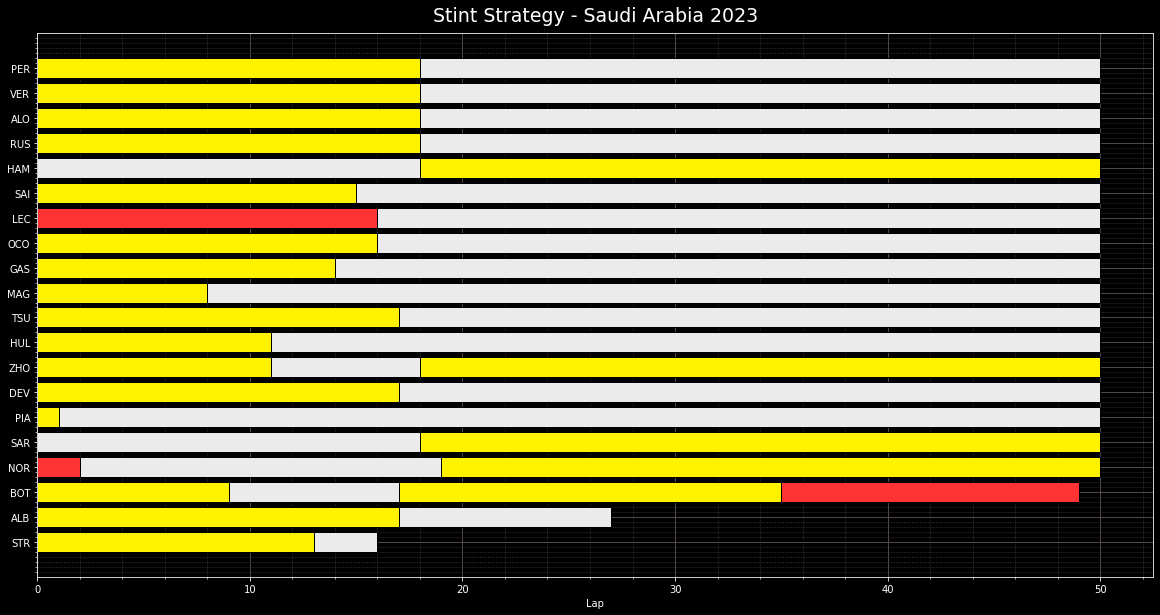

In [16]:
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(20,10))

for driver in session.results['Abbreviation']:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]
    
    previous_stint_end = 0
    for x, stint in stints.iterrows():
        plt.barh(
            [driver], 
            stint['StintLength'], 
            left=previous_stint_end, 
            color=compound_colors[stint['Compound']], 
            edgecolor = "black",
            linewidth=1
        )
        
        previous_stint_end = previous_stint_end + stint['StintLength']

plt.title(f'Stint Strategy - {RACE} {YEAR}')
plt.xlabel('Lap')
plt.gca().invert_yaxis()
plt.savefig(f"Stint Strategy - {RACE} GP {YEAR}.jpg", dpi=600)